In [45]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import math
import seaborn as sns
from scipy import stats as st

In [46]:
games_df = pd.read_csv('games.csv')

In [47]:
for column in games_df.columns:
        games_df.rename(columns={column: column.strip()}, inplace=True)

games_df.columns = games_df.columns.str.lower()
games_df.info()
print(games_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart 

In [48]:
games_df['name'] = games_df['name'].fillna('unknown')
print(games_df['name'].value_counts())
need_for_speed = games_df[games_df['name'] == 'Need for Speed: Most Wanted']
print(need_for_speed)

name
Need for Speed: Most Wanted                         12
Madden NFL 07                                        9
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11560, dtype: int64
                              name platform  year_of_release   genre  \
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0 

- Rellene los pocos valores ausentes con unknown ya que creo, no podemos adquirir mas informacion al respecto.
- Los valores duplicados de la columna name se deben a que son titulos que se publicaron en distintas plataformas en diferentes años.

- La columna platform no tiene ningun problema.

In [49]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(games_df['year_of_release'].mean())
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

- Cambie el tipo de dato a int ya que me parece mas logico que un año sea un entero o un object.
- Escogi rellenar los valores ausentes con la media de la columna ya que considero que esta es la opcion que mas probabilidad de ocurrir y no es necesario usar una mediana. 

In [50]:
games_df['genre'] = games_df['genre'].fillna('unknown')

- La columna genre solo tienen dos valores ausentes, estos fueron remplazados por unknown ya que no podemos obtener mas informacion al respecto.

- Las columnas na_sales, eu_sales, jp_sales y other_sales no tiene nigun problema.

In [51]:
games_df['critic_score'] = games_df['critic_score'].fillna(games_df['critic_score'].mean())
np.array_equal(games_df['critic_score'], games_df['critic_score'].astype(int))
games_df['critic_score'] = games_df['critic_score'].astype(int)

- Rellene los valores ausentes con mean ya que me parece que es el score que mas probabilidad tiene de ser dado.
- Comprobe que todos los valores de la columna fueran enteros para despues concluir que no se perdia ninguna infimacion si convertia la columna a int.

In [52]:
games_df['user_score'] = games_df['user_score'].fillna(0)
games_df['user_score'] = games_df['user_score'].replace('tbd', 0)
games_df['user_score'] = games_df['user_score'].astype(float)
games_df['user_score'] = games_df['user_score'].fillna(games_df['user_score'].mean())

- La columna user_score debe ser un float debido a que sus valores son decimales y puede que en algun momento querramos trabajar con ello como un numero y no como un object(su tipo original)
- He decidido remplazar los valores ausentes y los 'tbd' por un 0, ya que coinsidero que es lo unico que se puede hacer para que estos valores no interfieran en el analisis, esto seguira asi al menos hasta que se determine cual es el score verdadero. 

In [53]:
games_df['rating'] = games_df['rating'].fillna('unknown')

- El unico problema de esta columna son los valores ausentes, y coinsidero que la unica forma de solucionarlo es poner otro str que represente que el valor es desconocido.

In [54]:
games_df['sales_per_game'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].apply(sum, axis=1)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  sales_per_game   16715 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


<Axes: title={'center': 'Games per year'}, xlabel='Year', ylabel='Games'>

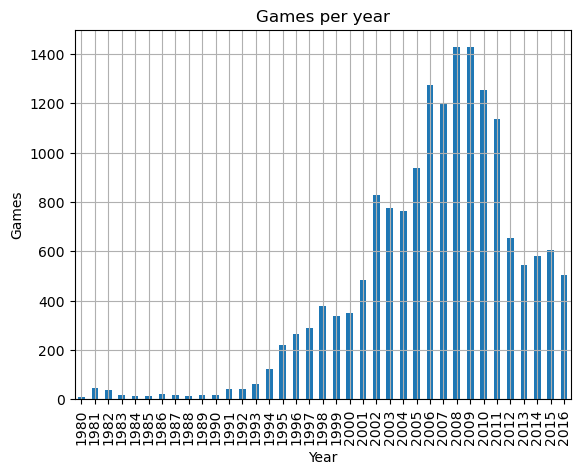

In [55]:
games_per_year = games_df.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', title = 'Games per year', xlabel='Year', ylabel='Games', grid=True)

- Se ve claramente que a aumentado la cantidad de juegos producidos por año. Sin embargo, si dividimos la grafica por decadas podemos ver que a partir del 2010 esta tendencia a dejado de existir. Esto se puede deber a que el mercado de videojuegos ya esta "establecido" o por la complejidad de los juegos que va aumentando.
- El periodo con mas videojuegos a sido del 2000 al 2010.

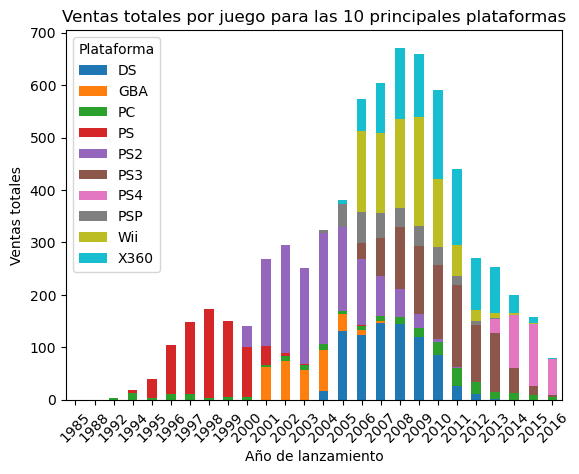

In [56]:
platforms_sales = games_df.groupby('platform')['sales_per_game'].sum()
top_platforms = platforms_sales.sort_values(ascending=False).head(10)
top_platforms_names = top_platforms.index
top_platforms_data = games_df[games_df['platform'].isin(top_platforms_names)]
sales_by_year_platform = top_platforms_data.groupby(['year_of_release', 'platform'])['sales_per_game'].sum().unstack()

sales_by_year_platform.plot(kind='bar', stacked=True)
plt.title('Ventas totales por juego para las 10 principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.show()

- Cada plataforma dura aproximadamente 10 años en aparecer y desaparecer del mercado. Dentre de esta decada las plataformas duran mas o menos 5 años en llegar a su mejor punto en terminos de ventas y 5 mas en "desaparecer" del top 10 del mercado.

- Vamos a filtrar los datos para fijarnos solo en el periodo de tiempo del 2006 en adelante ya que estos son los años mas importantes para entender la industria en los ultimos año. Todo esto para construir el modelo mas aproximado de como va a funcionar el mercado en 2017.

In [58]:
games_relevant_years = games_df[games_df['year_of_release'] > 2006]